# Background

**Scenario**: A series of communication towers are being built. How will coverage improve?

**Main Assumptions**:

- The plot of land is a flat rectangle whose dimensions can be described by integer units.
- Each tower is placed randomly and has a random range of coverage.
- Each tower's coverage is also rectangular and has integer dimensions of the same uints.
- If a tower is placed and overlaps a pre-existing tower's coverage, the new tower's coverage is reduced to its largest rectangle outside of the already covered range.



**Programming Goals**
1. Given a plot of land and a set number of towers, simulate the placement of towers and calculate their coverage.
2. Given a plot of land, calculate the average number of towers necessary to completely cover the plot.

**Note**: Use of this notebook requires that the numpy and matplotlib modules be available.

# Function Overview

### `plot_land(L,W)`

**Description:** Generates a two-dimensional array of zeros of specified dimensions

**Additional Modules Called**
- [`numpy.zeros()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.zeros.html), used to generate the array

**Parameters**

- **L:**
    - *int, > 0*
    - length of plot of land; translates into the number of rows in the array

- **W:**
    - *int, > 0*
    - width of the plot of land; translates into the number of elements in each row

**Output**
- *ndarray*
- Numpy array of zeros (32-bit integers) arranged in L rows and W columns.
- "0" in the array represents a node which is a 1 unit$^2$ sized area of land with no tower coverage. A non-zero value would indicate coverage.
- This is important for establishing a starting point of the plot without any coverage. This function can be done iteratively if simulating the process of completely covering a plot of land.

**Code**

In [1]:
def plot_land(L, W):
    '''
    Given the dimensions, create a new plot of land that requires
    coverage by communication towers.
    
    The module numpy must be available for this function to work.
    
    This function has two primary purposes. First it passes W and L, the
    user inputs for width and length of the plot of land to be
    populated with communication towers, through an assert statement.
    This checks that W and L are positive (n>0) integers.
    
    Then the function imports the numpy module before generating a
    two-dimensional array of zeros with L rows and W values in each row.
    The zeros themselves are 32-bit integers.
    
    :@param W: int, horizontal dimension of plot
    :@param L: int, vertical dimension of plot
    :@return: ndrray, int, zeros representing no coverage
    '''
    for dimension in [W, L]:
        assert isinstance(dimension, int) and bool(dimension > 0), \
               "Plot dimensions must be positive integers."
    
    try:
        import numpy
    except:
        print "numpy module not found." #checking for numpy module
    
    import numpy as np
    emptyPlot = np.zeros((L, W), dtype='int32') #generate output array
    
    return emptyPlot

**How It Works**

- First, the function passes W and L through an `assert` that checks that these dimensions are `int` types and are greater than 0.
- The function also checks that numpy is available to import.
- It then imports numpy and generates a plot of 0's, type `int32`, with the specified dimensions `L` and `W`. `L` becomes the number of rows, and `W` becomes the number of columns in the 2-D array.
- This new plot is then returned as the output.

**Example and Visualization**

In [2]:
myland = plot_land(3,5) #generate an empty 3x5 plot with no coverage
print myland

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


____

### `make_random_tower(plotArray)`

**Description:** Generate an array with randomly generated, rectangular coverage within a given plot.

**Additional Modules Called**
- [`numpy`](https://docs.scipy.org/doc/numpy-1.14.0/reference/), used to generate and manipulate arrays
- [`numpy.random.randint()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint), used to sample from a discreet, uniform distribution
- [`numpy.nditer()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nditer.html), used to iterate element-wise over an array with access to multi-dimensional indices.

**Parameters**
- **plotArray**
    - *ndarray*
    - A numpy array containing only integers equivalent to 0 or 1. Values of each element are not important to this function.
    - Represents the total area in which the tower coverage may be placed.

**Output**
- *ndarray*
- 2-dimensional numpy array of the same dimensions as the input `plotArray`.
- Will be composed of integers 0 or 1.
- A value of 1 means that the node (a 1 unit$^2$ area of land) has coverage under the newly generated tower. 0 means that it does not.
- Pre-existing coverage, as indicated by the input, is not considered.

**Code**

In [3]:
def make_random_tower(plotArray):
    '''
    Generates a random rectangle representing one tower's coverage in a
    given plot of land. Does not deal with overlapping and trimming.
    
    Numpy module must be available. Asserts that the input is a
    two-dimensional numpy array after importing numpy.
    
    Grabs the dimensions of the array and stores in L and w. Using
    randint, two indices per dimensions are chosen. These are sorted and
    combined in a tuple that describes the ranges, inclusive, in which
    the final rectangle will be.
    
    An array of the same dimensions as the input is generated. It is
    made iterable by np.nditer(). By iterating element-wise and
    comparing each element's row and column indices to the rectangle
    ranges, the function finds the nodes that should be ones and
    leaves the remainder as zeros.
    
    The output array is checked for correct dimensions and whether it
    only contains zeros and ones. It is then returned as the output.
    
    :@param plotArray: ndarray, dimensions represent a plot of land
    :@return: ndarray, plot with random coverage rectangle mapped out
    '''
    import numpy as np #used for arrays and random integers
    
    assert isinstance(plotArray, np.ndarray), \
           "Input must be a two-dimensional numpy array."
           #check if a numpy array
    assert bool(len(plotArray.shape) == 2), \
           "Input must be a two-dimensional numpy array."
           #check if 2-D
    
    L, W = plotArray.shape #save row number as L and cols as W
    
    rectW = list( np.random.randint(0, W, 2) )
    rectL = list( np.random.randint(0, L, 2) )
    #picks two values per dimension, determines range of length & width
    rectW.sort()
    rectL.sort()
    #sort coordinates in an increasing order
    
    rectRange = tuple( rectL + rectW )
    #Combine coords in pattern of (row1, row2, col1, col2)
    assert bool(len(rectRange) == 4) #Checking shape of output
    
    rectPlot = plotArray * 0 #new zeros array; gets reactangle of one's
    
    iterPlot = np.nditer( \
               rectPlot, flags=['multi_index'], op_flags=['writeonly'])
    #Make iterable version of input plot array
    #Flag args provide multiple indices and permits writing in data
    while not iterPlot.finished: #loop through each element in array
        i,j = iterPlot.multi_index #save indices in i & j
        if rectRange[0] <= i <= rectRange[1] \
           and rectRange[2] <= j <= rectRange[3]:
            #testing for each position if in tower coverage
            iterPlot[0] = 1 #If in range, change value to a one
        iterPlot.iternext() #moves to next element in array
    
    assert bool(rectPlot.shape == plotArray.shape)
    #final array output should be the same shape as the input
    assert bool( 0 < np.sum(rectPlot) == \
           (rectRange[1]-rectRange[0] +1) \
           * (rectRange[3]-rectRange[2] +1) )
    #check that the correct, non-zero area of coverage has been plotted
    return rectPlot

**How It Works**

1. It `assert`s that the input variable is a 2-dimensional numpy array.
2. Then it stores the dimensions of the array as `L` (number of rows) and `W` (number of columns).
3. Using `numpy.random.randint()`, four coordinates are chosen to represent the coverage boundaries.
    - This is done in two steps to get the length and width separately. 
    - The numpy module selects from a uniformly distributed, discreet distribution, so each possible value has an equal chance of getting selected.
    - The range of possible results are set to be from 0 to L or W - 1. This range matches the indices of nodes available in the input array.
    - To clarify, if both results are the same, then the coverage gets a width of one column. If they yield "2" and "4", then the resulting coverage is 3 columns wide across columns 2 thorugh 4.
    - This is due to coverage being based on discreet nodes rather than boundaries or ranges along an axis.
    - Additionally, this method as the benefit of never generating a rectangle of area 0. E.g. Coordinates $(0,0,0,0)$ would still have an area of 1, as it would cover the node at row index 0, column 0.
4. The coordinates are ordered from smallest to greatest and concatenated into a single tuple.
    - They are put in order of first row, last row, first column, last column.
    - This makes it easier to refer to coordinates by their index in the tuple.
5. A variable is called, `rectPlot`, which will store the plot of which nodes are covered by the randomly generated coordinates. It is the element-wise product of the input and 0, making it an array of 0's at first.
6. Next `iterPlot` is made using `np.nditer()`. The `'multi_index'` flag makes the row and column index available, and `'writeonly'` lets it write into the original array `rectPlot`.
    - The function iterates over each node in the array starting at index (0,0) going across columns then down rows.
    - At each node, it checks whether the indices are within the row and column range of the randomly generated coordinates. comparisons are made with `<=` to achieve the behavior described above.
    - Nodes within the range of coverage are converted to a value 1. Otherwise, they are left as 0.
7. Afterwards, the `rectPlot` is checked for correct dimensions and non-zero coverage and `return`ed as the result.

____

### `remove_overlap(towerPlot, totalPlot)`

**Description:** Compares the coverage from one randomly placed tower's coverage to the pre-existing coverage where the tower will be placed.

**Additional Modules Called**
- [`numpy`](https://docs.scipy.org/doc/numpy-1.14.0/reference/), used to generate and manipulate arrays
- [`numpy.nditer()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nditer.html), used to iterate element-wise over an array with access to multi-dimensional indices.
- [`numpy.array_equal()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html), used to check whether two arrays are equivalent by element.

**Parameters**
- **towerPlot**
    - *ndarray, int*
    - A numpy array representing the coverage of a single tower.
    - All nodes of 1 are within range and nodes of 0 are outside.
- **totalPlot**
    - *ndarray, int*
    - A numpy array representing the pre-existing coverage within the entire plot of land.
    - All nodes of 1 are within range of coverage and nodes of 0 are outside.

**Output**
- *ndarray, int*
- A numpy array of 1's and 0's.
- All nodes contianing 1 are within the coverage of the new tower and outside of the pre-existing coverage.


**Code**

In [4]:
def remove_overlap(towerPlot, totalPlot):
    '''
    Locate where a new tower range overlaps with pre-existing coverage.
    Imports numpy and asserts that inputs are numpy arrays of the same
    dimensions. It then checks whether only zeros or ones are in the
    arrays.
    
    Numpy module must be available to function.
    
    If totalPlot, the pre-existing coverage, only has zeros, the tower
    plot is simply returned. Otherwise, the function continues to
    combining both input plots. The tower plot is multiplied by 2 and
    added to the pre-existing coverage. Thus, values of 2 in the
    new layerPlot indicate coverage from the tower that does not
    overlap with the pre-existing coverage.
    
    To generate the output, the function iterates element-wise over the
    layerPlot and replaces 2's with one and everything else with zero.
    This output is checked such that its dimensions are the same as the
    inputs and its coverage does not exceed that of the tower input.
    
    :@param towerPlot: ndarray, coverage for a random tower
    :@param totalPlot: ndarray, pre-existing coverage in a plot
    :@return: ndarray, new area covered by tower
    '''
    import numpy as np
    
    assert isinstance(towerPlot, np.ndarray), \
           "Tower input not a numpy array"
    assert isinstance(totalPlot, np.ndarray), \
           "Pre-existing plot input not a numpy array"
    assert bool(towerPlot.shape == totalPlot.shape), \
           "Inputs must be the same dimensions"
    for coord in np.nditer(towerPlot):#loop thorugh each element
        assert bool(coord == 0 or coord == 1), \
               "Tower input array may only contain 0s or 1s"
    for coord in np.nditer(totalPlot): #loop thorugh each element
        assert bool(coord == 0 or coord == 1), \
               "Tower input array may only contain 0s or 1s"
    
    if np.array_equal(totalPlot, np.zeros( totalPlot.shape )):
        #compares input to same-dimension array of zeros
        return towerPlot
        #If there is no coverage already, just return the new coverage
    else:
        pass
    
    layerPlot = (towerPlot * 2) + totalPlot
    #Layers the two plots together
    #new coverage = 2, old coverage = 1, no coverage = 0, overlap = 3
    
    iterPlot = np.nditer( layerPlot, op_flags=['writeonly'] )
    #lets the function iterate element-wise over the layer and rewrite
    while not iterPlot.finished:
        if iterPlot[0] == 2: #looks for new coverage
            iterPlot[0] = 1 #new coverage is now 1
        else:
            iterPlot[0] = 0 #all pre-existing coverage becomes 0
        iterPlot.iternext() #points to next element
    
    assert bool( np.sum(layerPlot) <= np.sum(towerPlot) )
    #check that the layer does not exceed the size of the tower coverage
    assert bool( layerPlot.shape == totalPlot.shape)
    #check that the dimensions haven't changed
    return layerPlot

**How it Works**

- The funciton `assert`s that both input parameters are numpy arrays of the same shape. Different shapes would mean that the inputs are describing two different plots of land.
- Iterates through each element in the array and `assert`s that it is either integer 1 or 0.
- Offers an early exit point: If there is no pre-existing coverage, then there is no overlap and the `towerPlot` is simply returned. Otherwise, it continues on.
- Here, a new array, `layerPlot`, is made from the element-wise sum of the `totalPlot` (pre-existing coverage) and 2 * `towerPlot`. See table below for how this helps differentiate the between coverages.

Equation: $layer = total + (tower * 2)$

| Value in layerPlot | Value in towerPlot  | Value in totalPlot | 
|:---:|:---:|:---:| 
| 0 | 0 | 0 | 
| 1 | 0 | 1 | 
| 2 | 1 | 0 | 
| 3 | 1 | 1 | 

- We are interested in the 2's in `layerPlot` because these values are exclusively in the `towerPlot` and not the pre-existing `totalPlot`.
    - `layerPlot` is made iterable with `numpy.nditer()` and then iterated through. The `'write_only'` flag lets the function edit the original `layerPlot` array.
    - Each element that is equivalent to 2 is converted into 1. All remaining elements become 0.
- As a result, `layerPlot` ends up with 1's in the nodes exclusively from the new tower and not in pre-existing coverage. The size and total sum of the array is compared to the tower input before it `return`s `layerPlot` as the final output.

____

### `get_largest_rectangle(inPlot)`

**Description:** 

**Additional Modules Called**
- [`numpy`](https://docs.scipy.org/doc/numpy-1.14.0/reference/), used to generate and manipulate arrays
- [`numpy.nditer()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nditer.html), used to iterate element-wise over an array with access to multi-dimensional indices.
- [`numpy.random.randint()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint), used to sample from a discreet, uniform distribution

**Parameters**
- **inPlot**
    - *ndarray, int*
    - The 'input' plot. A numpy array consisting of 0's and 1's
    - At this part in the solution, this is the coverage from a new tower trimmed by its overlap with pre-existing coverage. 

**Output**
- *ndarray, int*
- A numpy array representing the largest possible rectangular coverage within the coverage from `inPlot`.
- If there are multiple rectangles that have the greatest possible area, will select from one of those.

**Code**

In [8]:
def get_largest_rectangle(inPlot):
    '''
    Makes candidate rectangles inside of the input plot where coverage
    is indicated. Finds and returns the largest one. Note that the
    coverage has already been trimmed for overlap with pre-existing
    towers.
    
    Module numpy must be available to function.
    
    First import numpy and check that the input plot is a numpy array
    containing only ones or zeros. Second define a method to create
    rectangles starting from a single point and extending out to the
    limits of coverage.
    
    Looping through each element in the input plot, each one is checked
    for being either zero or one. Zero values are ignored. Ones have
    their row and column indices fed into the encapsulated function
    along with the input plot, yielding a plot with rectangular coverage
    that is stored in a holding list. The function is called again on
    transposition of the input and indices to yield another rectangle
    from that corener.
    
    If the list of rectangles ends up empty, an empty array is returned
    as the final output. Otherwise, the rectangle with the maximum array
    sum is identified using a lambda argument insied of max().
    
    To find rectangles that may have the same area, the rectangle
    candidate list is looped over, this time comparing each item's
    sum to the one picked out. If multiple plots have the same area,
    one is chosen randomly by generating a random integer index from
    a uniform distribution.
    
    This output is checked so that its dimensions match the output and
    that its locations of ones is a subset of the input file's
    locations. This array of the trimmed, rectangular coverage is
    finally returned as the output.
    
    :@param inPlot: ndarray, original non-overlapping coverage
    :@return: ndarray, largest rectangular coverage from inPlot
    '''
    import numpy as np
    
    assert isinstance(inPlot, np.ndarray), \
           "Input must be a numpy array"
    for coord in np.nditer(inPlot): #loop thorugh each element
        assert bool(coord == 0 or coord == 1), \
               "Input array may only contain 0s or 1s"
    
    def sweep_from_corner(thePlot, r1, c1,transposed=False):
        '''
        Given a starting point, generate one rectangle sweeping right
        then down and another sweeping down then right until they reach
        the boundary of coverage.
        
        The inputs designate the upper-left corner of the rectangular
        coverage. Plot dimensions are saved from thePlot (same as
        inPlot from the outer function). Ending row and column are
        initially the same as the starting ones.
        
        The function loops through columns indices, checking which
        elements on the same row also contain ones and thus are part of
        the coverage. Then the function sweeps down, checking its slice
        of row for zero values. The last indices are saved as the last
        row and column.
        
        A new plot is created. It is populated by zeros and ones by
        iterating over each element and checking whether its indices
        fall within the deteermined coverage rectangle. Coverage means
        one and no coverage is zero.
        
        If transposed is true, the function transposes result before
        returning it as a result. Otherwise the function simply returns
        in its current state.
        
        :@param inPlot: ndarray, original non-overlapping coverage
        :@param r1: int, row index to start from
        :@param c1: int, col index to start from
        :@param transposed: bool, whether the input was transposed
        :@return: ndarray, plotted largest rectangle from r1,c1
        '''
        
        length, width = thePlot.shape #dimensions as easy to read vars
        c2 = c1 #last column is called; can increase from here
        r2 = r1 #last row is called; can increase from here
        
        for i in range(c1, width):
        #loop through column c1 to the right
            if thePlot[r1][i] == 1:
                c2 = i #assign column 2 as last successful column
            else:
                break #done once c2 is assigned
        
        for j in range(r1, length):
        #loop thorugh each row
            if 0 not in thePlot[j][c1:c2+1]:
            #check for zeros in each row; the first should never fail
                r2 = j #save the index of last successful row
            else: #Stop when reaches a row with 0
                break
        
        outPlot = thePlot * 0 #new plot to add the new rectangle
        iterOut = np.nditer(outPlot, \
                  flags=['multi_index'], op_flags=['writeonly'])
        #iterate over each element and apply 1s in rectange range
        while not iterOut.finished:
            k,l = iterOut.multi_index
            if r1 <= k <= r2 and c1 <= l <= c2:
            #check if indices in range of r1-r2 & c1-c2
                iterOut[0] = 1 #change to 1 if in coverage
            else:
                pass
            iterOut.iternext()
        
        assert outPlot.shape == thePlot.shape
        #should generate a plot with the same shape as input
        assert np.sum(outPlot) <= np.sum(thePlot)
        #total coverage of output can't be more than input
        
        if transposed == True: #if input transposed before
            return np.transpose(outPlot)
            #transpose plot to return to original orientation
        else:
            return outPlot #return detected subset of coverage
    
    rectList = [] #store arrays representing rectangles of coverage
    
    itPlot = np.nditer(inPlot, flags=['multi_index'])
    #make an iterable for inPlot with indices available
    while not itPlot.finished:
        if itPlot[0] == 1:
        #finds each location in coverage from input
            i,j = itPlot.multi_index
            rectList.append( sweep_from_corner(inPlot, i, j) )
            #making largest rectangle by going right then down
            rectList.append( \
            sweep_from_corner(np.transpose(inPlot), j, i, True) )
            #biggest rectangle sweeping down the right
            #done by transposing the array at the start and end
        itPlot.iternext()
    
    #rectList should now have all the largest rectangles in coverage
    if len(rectList) == 0:
        assert np.sum(inPlot) == 0, "No rectangle found:\n%s\n" % inPlot
        #Gets empty list if input is only an array of zeros
        return inPlot * 0
        #returns an array of zeros if no rectangles found
    else:
        pass #keep going if there are rectangles
    
    largestRect = max(rectList, key=lambda rarray: np.sum(rarray))
    #finding the largest rectangles by taking the sum of each array
    assert bool(np.sum(largestRect) <= np.sum(inPlot))
    #largest trim shouldn't be greater than the original coverage
    
    allLargest = [largestRect]
    #listing all of the largest rectangles in case of ties
    for bigRect in rectList:
        if np.sum(bigRect) == np.sum(largestRect):
        #compare coverage areas
            allLargest.append(bigRect) #list it if it's just as big
        else:
            pass
    randRect = allLargest[ np.random.randint(0,len(allLargest)) ]
    #pick a random rectangle from the list to limit bias
    
    assert bool(randRect.shape == inPlot.shape), "%s" % (randRect)
    #end result should still be the same dimensions as the start
    assert (-1) not in (inPlot - randRect)
    #ensures that newly trimmed coverage is within the original
    return randRect

**How It Works**

1. `assert` that the input is an `ndarray` and that it only has 1's and 0's. (Need ot put it in still)
2. Make `inPlot` iterable with `numpy.nditer()` and iterate through each element looking for points within the new tower's coverage (indicated by value of 1's).
    - If the value is 0, do nothing.
    - If the value is 1, feed the input plot and row, column indices to encapsulated function `sweep_from_corner()`
    - Then feed `sweep_from_corner()` the transposed input plot with the row, column indices swapped. Include `True` input to inform the function that the plot has been transposed prior to putting it through the function.
    - `sweep_from_corner()` yields the biggest rectangles with the starting point as its upper-left corner. Both results get stored in the list of candidate rectangles, `rectList`.
3. How `sweep_from_corner()` generates plots of candidate rectangles.
    - Its inputs are the `inPlot` from the main function (*ndarray*), a row index (*int*), column index (*int*), and  whether the input has been transposed (*bool*). The indices are used as the first row and column with the rectangle.
    - This function is defined separately due to being called twice each time a starting corner is identified.
    - Starting from the row and column index given, first it scans across the row by increasing index until it reaches the end or the zero. The last column with value 1 is recorded as the last column of the rectangle. * Note: It is possible that the same column is the first and last column.
    - Then the function iterates down each row, checking whether its slice of the columns only contains 1's. The last row index for which this is true is saved as the last row of the rectangle.
    - A new array of same dimensions as the input array is made. The function iterates through each element and places a 1 if it is within the column and row range of the rectangle; leaves a 0 otherwise.
    - This new array is `return`ed as the output of the function. If transposed is `True`, it will transpose the array back to its original orientation.
    - **Main Pro**: Limits the arrays that need to be saved to memory, as opposed to generating a set of all possible rectangles within the total plot area in a completely bottom-up approach.
    - **Main Con**: Introduces more nested loops, increasing the number of steps to get to the solution.
4. Once the list of all of the candidate rectangles is made, it is checked for length. If the length is 0, then an array of zeros is returned as the final output. This is done ot avoid feeding empty iterables to the upcoming `max()` function.
5. The candidate with the largest coverage is picked by taking the sum over each array. More 1's means more coverage.
6. It goes back into the list and looks for more arrays with the same area, since `max()` only yields one result. These are all saved into a new list, `allLargest`.
7. From the list of `allLargest` rectangles, one is randomly chosen by index, picked by calling `numpy.random.randint()`. This is a uniform, discreet distribution, so each array has an equal chance of being chosen.
8. A quick `assert` for dimensions and another checking that the coverage nodes in the output are a subset of the input.
9. `return`s the final coverage plot for the tower, ready to be added into the plot of overall coverage.

### Illustrating `sweep_from_corner()`

- Assume that we have a coverage plot array like the one below. This needs to get trimmed into a rectangular shape. 

```python
array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0]])
```
- Graphically, this can be visualized as such, where each element is at the inteersection of a gridline, yellow represents coverage, and the dark background has no coverage:

![alt text](https://raw.githubusercontent.com/SeanEGuy/Random_Comm_Towers_ECE143_SP18/master/inputsim.png "Sweep Input Example")

- The iterator looking for coverage points to feed into `sweep_from_corner()` starts at row, col index (0,0) (top-left corner of the grid) and moves to the right then down. Thus, the first coordinates to be fed into the encapsulated function will be (1,0).

![alt text](https://raw.githubusercontent.com/SeanEGuy/Random_Comm_Towers_ECE143_SP18/master/firstcorner.png "Designate where to sweep")

- The function then iterates moving to the right and stores the last value of one.

![alt text](https://raw.githubusercontent.com/SeanEGuy/Random_Comm_Towers_ECE143_SP18/master/firstrow.png "sweep first row")

- Next the function sweeps down rows, checking if there are any zeros. The row index 2 has zeros, so it saves this range as the first rectangle.
- After the first rectangle, `sweep_from_corner()` is fed the same plot but transposed. This  ensures that all possible rectangles inside of the coverage plot can be accessed.
- The transposed rectangle follows the same steps of sweeping right then down. The difference comes at the end where the `True` input tells `sweep_from_corner()` to transpose the array before `return`ing it as output. The graphs below illustrate the steps from left to right.

**Steps:** *Transpose -> Sweep across Columns -> Sweep down Rows -> Transpose Back*

![alt text](https://raw.githubusercontent.com/SeanEGuy/Random_Comm_Towers_ECE143_SP18/master/transposesteps.png "Transposed steps")

- This process thus yields the two largest rectangles for a point inside of the coverage area.
- The outer function `get_largest_rectangle()` handles applying the inner function to each node in the coverage to generate the list of candidate rectangles. This list is then fed into a `max()` function for the total sum of each array to identify the largest possible area.
- Note: This method yields an empty list if the input is only 0's. If so, `get_largest_rectangle()` will just return an array of 0's.

____

### `plot_ntowers(L, W, n=0)`

**Description:** Given a plot of land, place towers randomly and monitor their coverage. Organizes other functions from this notebook to go straight from defining a total plot of land to the total coverage or towers used to cover it.

**Additional Modules Called**
- [`numpy.sum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), used to find the total coverage area (sum of each element valued either 0 or 1).
- All preceding functions \[`plot_land()`, `make_random_tower()`, `remove_overlap()`, `get_largest_rectangle()`\] must have been defined in the kernel.

**Parameters**
- **L:**
    - *int, > 0*
    - length of plot of land; translates into the number of rows in the array

- **W:**
    - *int, > 0*
    - width of the plot of land; translates into the number of elements in each row
- **n:**
    - *int, >= 0, default=0*
    - The number of towers to place in the plot of land.
    - If n=0, the place towers until until the plot is completely covered by the tower ranges.

**Output**
- If n>0, *tuple* with the total area covered (*int*) at index 0 and proportion of the area covered (*float* truncated to two places past the decimal) at index 1.
- If n=0, returns the number of towers placed to cover the whole plot area (*int*).

**Code**

In [6]:
def plot_ntowers(L, W, n=0):
    '''
    Tracks coverage as towers are randmly placed in a designated plot of
    land. Can calculate the coverage from n towers or count the number
    of towers required to fill the plot completely.
    
    Numpy module must be available to function.
    
    Dimensions are checked to be postive integers. Same for n, except it
    may equal zero.
    
    It then creates an empty plot to be filled with towers. The loop
    goes through making a tower, removing its overlap with other
    coverages, trimming back into a rectangle, adding the coverage
    into the main plot, and tracking the number of towers built.
    
    The loop ends if the plot is completely covered or if input n is
    non-zero and that many towers have been built.
    
    Asserts that the number of towers counted is a positive integer
    value. Also checks that the proportion of the total plot covered
    is greater than zero and less than or equal to one.
    
    n is zero, then the number of towers used to fill the plot is
    returned as the output. Otherwise, the area covered--found by
    taking the sum of the main plot array--and the proportion of total
    area covered is returned inside a two-element tuple.
    
    :@param plotLen: int, length of the plot; stored as rows in an array
    :@param plotWidth: int, width of plot; stored as columns in an array
    :@param n: int, towers built; if 0, will count towers to fill.
    :@return: tuple, total area and proportion covered
              OR
              int, towers built to fill plot if n=0
    '''
    import numpy as np
    
    assert isinstance(L, int) and L > 0, \
           "Length must be a positive integer."
    assert isinstance(W, int) and W > 0, \
           "Width must be a positive integer."
    assert isinstance(n, int) and n >= 0, \
           "n must be an integer and > or = 0"
    
    mainPlot = plot_land(L,W) #generate the empty plot
    totalArea = L * W
    
    nBuilt = 0 #tracks number of towers built; says when to exit loop
    finished = 0 
    while finished == 0: #may be changed by different events to end loop
        randTower = make_random_tower(mainPlot)
        #generate a tower with random rectangular coverage
        overlapFree = remove_overlap(randTower, mainPlot)
        #remove parts of coverage already in the main plot
        trimTower = get_largest_rectangle(overlapFree)
        #find the largest rectangle in the remaining region
        mainPlot += trimTower
        #add the new coverage to the rest of the coverage
        nBuilt += 1 #counting towers
        if nBuilt == n and n != 0 \
           or np.sum(mainPlot) == totalArea:
        #checking whether its reached n-towers or filled the whole plot
            finished += 1
        else:
            pass
    
    assert isinstance(nBuilt, int) and nBuilt > 0
    #The number of towers must be an integer 1 or greater
    ratioCovered = np.sum(mainPlot) / float(totalArea)
    assert 0 < ratioCovered <= 1
    #The proportion of the area covered is between 0 and 1
    
    
    if n == 0: #no number of towers given
        return nBuilt #return n towers built
    else:
        return ( np.sum(mainPlot), round(ratioCovered, 3) )
        #return tuple, number of 1s in the plot and
        #the proportion of the area they cover (decimal).

**How It Works**

1. `assert`s that `L`, `W`, and `n` are all integers. `L` and `W` are positive and `n`  >= 0.
2. Makes an empty plot with `plot_land()`.
3. Start a while loop with an arbitrary exit condition.
```python
while finished == 0:
```
This frees the function to break after an arbitrary number of loops, since the number of towers that will fill the whole plot is not known beforehand.
4. In the loop, make a random tower, trim it by its overlap with pre-existing coverage, and trim again to its largest rectangle. Uses `make_random_tower()`, `remove_overlap()`, and `get_largest_rectangle()` in that order.
5. Add the processed tower coverage to the overall coverage plot by element-wise addition. Add one to the tower counter `nBuilt`.
6. If n=0, return the current value of the tower counter. Otherwise, calculate the total area covered by taking the sum of all elements in the plot. Each covered node should have a value of 1, which translates to an area of 1 unit$^2$. Return a tuple containing the coverage area and the fraction of the total area covered.

### Using `plot_ntowers()` to Find Proportion of Coverage

In [9]:
# Total plot is 5 units by 6 units.
# How much will 4 random towers cover?
coverOut = plot_ntowers(5, 6, 4)
print "{} unit^2 have coverage.\n".format(coverOut[0])
print "This is {} of the total plot area.".format(coverOut[1])

25 unit^2 have coverage.

This is 0.833 of the total plot area.


### Using `plot_ntowers()` to Find Towers Used for Complete Coverage

In [10]:
# Total plot is 5 units by 6 units.
# How many towers will be used to cover it?
countOut = plot_ntowers(5, 6)
# n towers not designated, so it will keep going until full
print "{} towers were made.".format(countOut)

9 towers were made.


___

### `sample_towersToFill(L, W, n=100)`

**Description:** Generates sample data of the number of towers placed to provide complete coverage a rectangular plot of land.

**Additional Modules Called**
- All preceding functions \[`plot_land()`, `make_random_tower()`, `remove_overlap()`, `get_largest_rectangle()`, `plot_ntowers()`\] must have been defined in the kernel.

**Parameters**
- **L:**
    - *int, > 0*
    - length of plot of land; translates into the number of rows in the array

- **W:**
    - *int, > 0*
    - width of the plot of land; translates into the number of elements in each row
- **n:**
    - *int, > 0, default=100*
    - The number of samples to be generated

**Output**
- *list, int*
- A list of the total towers reuired to fill the plot for each trial.

**Code**

In [11]:
def sample_towersToFill(L, W, n=100):
    '''
    To estimate the number of towers needed to fill a plot of land, this
    function simulates the process of filling a plot up for n
    repetitions.
    
    Asserts that all inputs are positive integers, then runs a loop for
    n iterations collecting the number of towers used each time a plot
    is filled. These results are stored as a list of integers.
    
    Before returning the results in a list, the list is checked for
    appropriate length n and content (integers only).
    
    :@param L: int, length dimension of the plot
    :@param W: int, width dimension of the plot
    :@return: dict, results with the number of times they occurred
    '''
    
    for funVars in [L, W, n]:
        assert isinstance(funVars, int) and bool(funVars > 0), \
            "%s must be a positive integer." % (funVars)
        #All inputs must be positve integers
    
    resultList = [] #List of tower counts from filling the plot
    for i in range(n):
        resultList.append( plot_ntowers(L, W, 0) )
        #append the result of filling the plot
    
    assert len(resultList) == n
    #check that the right number of iterations was made
    for result in resultList:
        assert isinstance(result, int) and result > 0
        #number of towers should be postive integer
    
    return resultList

**How It Works**

1. `assert` that all inputs are positive integers.
2. Start a list to hold the results from each sample.
3. Loop `n` times, each time calling the `plot_towers(L,W,0)` function and feeding it the plot dimensions. The '0' indicates that we are looking for the number of towers placed before the plot is completely covered.
4. Check that we got all of the results we wanted and that they make sense (are positive integers). Returns the list of results.

### Using `sample_towersToFill()` to Find the Average Number of Towers Needed to Fill a Plot

**Question:** On average, how many towers are needed to completely fill a rectangular plot?

- `sample_towerToFill()` simulates the filling of the plot n times and reports the number of towers used each time.
- This informs us of the distribution of the number of towers and relatively how often each result appears.
- Finding the center of this distribution will give us an estimation of the average number of towers needed.
- Below is an example where we attempt to estimate the towers needed for an 8-by-12-unit plot of land.

In [12]:
towerSamples = sample_towersToFill(8, 12, 1000)
#8 rows, 12 columns, fill 1000 times
print towerSamples[0:10] + ["..."]
#show first 10 items in list

[59, 106, 90, 44, 105, 66, 49, 65, 49, 78, '...']


- Now that we have a list of samples, we can visualize our results.
- Using `matplotlib.pyplot.hist()` will show the number of results that fall within a range of towers used.
- *Usage note:* Run the cell below twice in a row if it does not work the first time. It seems to return the plot object sometimes instead of actually displaying the plot.

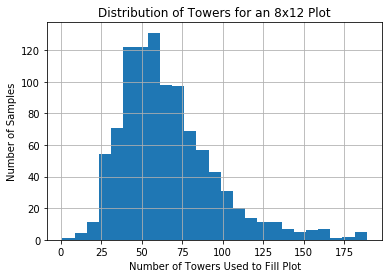

In [14]:
import matplotlib.pyplot as plt
plt.hist(towerSamples, bins=25)
#Split results into 25 bins
plt.xlabel('Number of Towers Used to Fill Plot')
plt.ylabel('Number of Samples')
plt.title('Distribution of Towers for an 8x12 Plot')
plt.grid(True)
plt.show()

- The histogram above shows that the distribution is somewhat bimodal --there are two peaks-- and heavily right-tailed --there are outliers much higher on the x-axis than the center.
- Since this distribution is right-tailed, the center may be more accurately described by the median than the mean. Outliers have a strong effect on the mean, so even before calculation, we should expect the mean to be greeater than the median.

In [15]:
plt.close()

In [16]:
towerSamples.sort() #sort the samples by increasing number
print "This is the mean: {}".format( sum(towerSamples) / float(len(towerSamples)) )
print "This is the median: {}".format(towerSamples[ len(towerSamples) / 2 ])

This is the mean: 66.096
This is the median: 61


**Conclusion:**

My estimate towers normally used to completely cover an 8-by-12 unit plot is the median of a distribution of 1000 plot covering simulations. The mean is ignored as it is likely an over-estimate due to outliers to the right.